# DATA & LIBRARY IMPORT

In [92]:
!pip install dmba

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classifier Neural Network
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Regressor Neural Network
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [94]:
### Link of data: https://www.kaggle.com/datasets/thedevastator/udemy-courses-revenue-generation-and-course-anal

In [95]:
link='https://drive.google.com/file/d/1eS-gj-rSXuWOW7PrlThjz5FoNZ8yczsX/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df1 = pd.read_csv(path)

In [96]:
link='https://drive.google.com/file/d/1pRlCNpdRM9hByENEYc-E_lHiwkhgOmEU/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df2 = pd.read_csv(path)

In [97]:
link='https://drive.google.com/file/d/1oZADS_ZXie832OpmywyKvC3c3C5_0HJT/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df3 = pd.read_csv(path)

In [98]:
link='https://drive.google.com/file/d/1Q9NSJ9byhyLKaiKitWsgjjbKZml6_0k0/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df4 = pd.read_csv(path)

In [99]:
link='https://drive.google.com/file/d/1uTEWZtfd3Blaeuzbir1nWZOHadYSUdNx/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df5 = pd.read_csv(path)

In [100]:
# Concatenate vertically
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,rating,Date,Free/Paid
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,NaN,NaN,NaN
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,NaN,NaN,NaN
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance,NaN,NaN,NaN
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance,NaN,NaN,NaN
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,885413.0,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0.0,0.0,18.0,Beginner Level,NaN,2.0,2016-07-27T21:07:46Z,Business Finance,0.95,2016-07-27,Paid
7353,1231958.0,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0.0,0.0,9.0,All Levels,NaN,2.5,2017-06-28T21:55:29Z,Business Finance,0.95,2017-06-28,Paid
7354,1057040.0,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0.0,0.0,12.0,Intermediate Level,NaN,1.0,2017-02-08T22:15:56Z,Business Finance,0.36,2017-02-08,Paid
7355,1258666.0,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0.0,0.0,9.0,All Levels,NaN,2.0,2017-06-29T23:20:10Z,Business Finance,0.15,2017-06-29,Paid


# DATA WRANGLING

## Check null

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357 entries, 0 to 7356
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            7352 non-null   float64
 1   course_title         7352 non-null   object 
 2   url                  7352 non-null   object 
 3   price                7352 non-null   float64
 4   num_subscribers      7352 non-null   float64
 5   num_reviews          7352 non-null   float64
 6   num_lectures         7352 non-null   float64
 7   level                7352 non-null   object 
 8   Rating               3677 non-null   float64
 9   content_duration     7352 non-null   float64
 10  published_timestamp  7352 non-null   object 
 11  subject              7353 non-null   object 
 12  rating               3676 non-null   float64
 13  Date                 3676 non-null   object 
 14  Free/Paid            3676 non-null   object 
dtypes: float64(8), object(7)
memory usage:

In [102]:
#change to Datetime
df['Date'] = pd.to_datetime(df['Date'])

In [103]:
df.isnull().sum()

course_id                 5
course_title              5
url                       5
price                     5
num_subscribers           5
num_reviews               5
num_lectures              5
level                     5
Rating                 3680
content_duration          5
published_timestamp       5
subject                   4
rating                 3681
Date                   3681
Free/Paid              3681
dtype: int64

In [104]:
# Rating and rating have values in either of each, so we merge values
df['RatingScore'] = np.where(df['rating'].notna(), df['rating'], df['Rating'])

# Drop the original 'rating' and 'Rating' columns if needed
df = df.drop(['rating', 'Rating'], axis=1)

In [105]:
#drop course_id is null
df = df.dropna(subset=['course_id'])

In [106]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Subject: Web Development', 'Web Development'], dtype=object)

In [107]:
#Change name of 'Subject: Web Development'
df['subject'] = df['subject'].replace('Subject: Web Development', 'Web Development')

In [108]:
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Date,Free/Paid,RatingScore
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,8.0,2013-04-20T02:25:22Z,Business Finance,NaT,NaN,0.56
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,1.5,2013-04-07T21:39:25Z,Business Finance,NaT,NaN,0.95
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,1.5,2013-12-25T19:53:34Z,Business Finance,NaT,NaN,0.91
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,1.5,2014-05-27T16:22:16Z,Business Finance,NaT,NaN,0.18
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,10.0,2016-01-21T01:38:48Z,Business Finance,NaT,NaN,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,885413.0,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0.0,0.0,18.0,Beginner Level,2.0,2016-07-27T21:07:46Z,Business Finance,2016-07-27,Paid,0.95
7353,1231958.0,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0.0,0.0,9.0,All Levels,2.5,2017-06-28T21:55:29Z,Business Finance,2017-06-28,Paid,0.95
7354,1057040.0,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0.0,0.0,12.0,Intermediate Level,1.0,2017-02-08T22:15:56Z,Business Finance,2017-02-08,Paid,0.36
7355,1258666.0,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0.0,0.0,9.0,All Levels,2.0,2017-06-29T23:20:10Z,Business Finance,2017-06-29,Paid,0.15


In [109]:
#Fill null in Date by extracting from Timestamp
# extract the date from Timestamp for Null value in Date
df['Date'] = pd.to_datetime(df['published_timestamp'].str.split('T').str[0], format='%Y-%m-%d', errors='coerce')

# Use .loc to avoid SettingWithCopyWarning
df.loc[:, 'Date'] = pd.to_datetime(df['published_timestamp'].str.split('T').str[0], format='%Y-%m-%d', errors='coerce')

<ipython-input-109-7c483ad2deec>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Date'] = pd.to_datetime(df['published_timestamp'].str.split('T').str[0], format='%Y-%m-%d', errors='coerce')


In [110]:
#Fill null in Free/Paid by Free if price = 0
df['Free/Paid'] = df['Free/Paid'].fillna(df['price'].eq(0).map({True: 'Free', False: None}))

In [111]:
# #Fill null in Free/Paid by Paid if price > 0
df.loc[df['price'] > 0, 'Free/Paid'] = df['Free/Paid'].where(df['Free/Paid'] == 'Paid', 'Paid')

In [112]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
Date                   0
Free/Paid              0
RatingScore            0
dtype: int64

## Check duplicates

In [113]:
#count duplicates
duplicate = df.duplicated().sum()

In [114]:
df = df.drop_duplicates()

In [115]:
# Change data type
df['course_id'] = df['course_id'].astype(int)
df['num_subscribers']=df['num_subscribers'].astype(int)
df['num_reviews']=df['num_reviews'].astype(int)
df['num_lectures']=df['num_lectures'].astype(int)

<ipython-input-115-2bc44b56e1e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['course_id'] = df['course_id'].astype(int)
<ipython-input-115-2bc44b56e1e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_subscribers']=df['num_subscribers'].astype(int)
<ipython-input-115-2bc44b56e1e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [116]:
df.head(10)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Date,Free/Paid,RatingScore
0,49798,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576,936,24,All Levels,8.0,2013-04-20T02:25:22Z,Business Finance,2013-04-20,Free,0.56
1,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659,4397,16,Beginner Level,1.5,2013-04-07T21:39:25Z,Business Finance,2013-04-07,Free,0.95
2,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855,2698,15,All Levels,1.5,2013-12-25T19:53:34Z,Business Finance,2013-12-25,Free,0.91
3,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167,1463,8,All Levels,1.5,2014-05-27T16:22:16Z,Business Finance,2014-05-27,Free,0.18
4,648826,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481,2347,174,All Levels,10.0,2016-01-21T01:38:48Z,Business Finance,2016-01-21,Paid,0.37
5,97338,Forex Basics,https://www.udemy.com/forex-basics/,0.0,22344,712,26,All Levels,3.5,2013-10-16T17:40:23Z,Business Finance,2013-10-16,Free,0.89
6,321410,Beginner to Pro in Excel: Financial Modeling a...,https://www.udemy.com/beginner-to-pro-in-excel...,195.0,22257,2697,138,Intermediate Level,7.5,2014-11-25T23:00:40Z,Business Finance,2014-11-25,Paid,0.13
7,301442,Black Algo Trading: Build Your Trading Robot,https://www.udemy.com/build-your-trading-robot/,200.0,20195,1113,227,All Levels,16.0,2014-10-27T22:01:36Z,Business Finance,2014-10-27,Paid,0.21
8,189160,Financial Analysis: A Recipe for Success,https://www.udemy.com/financial-analysis-a-rec...,0.0,19614,635,14,All Levels,1.5,2014-04-23T15:10:52Z,Business Finance,2014-04-23,Free,0.30
9,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-sto...,0.0,19339,794,9,All Levels,2.0,2014-03-31T21:35:06Z,Business Finance,2014-03-31,Free,0.89


## Encoding

In [117]:
# Encoding Free/Paid
df['Free/Paid'] = df['Free/Paid'].map({'Free': 0, 'Paid': 1})

<ipython-input-117-735df982c62b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Free/Paid'] = df['Free/Paid'].map({'Free': 0, 'Paid': 1})


In [118]:
print(df['level'].unique())
print(df['subject'].unique())

['All Levels' 'Beginner Level' 'Intermediate Level' 'Expert Level']
['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


In [119]:
# Encoding level
df['Level_Encoded'] = df['level'].map({'All Levels':0, 'Beginner Level':1, 'Intermediate Level':2,'Expert Level':3})

<ipython-input-119-328605bf95ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Level_Encoded'] = df['level'].map({'All Levels':0, 'Beginner Level':1, 'Intermediate Level':2,'Expert Level':3})


In [120]:
# Encoding subject
df['Subject_Encoded'] = df['subject'].map({'Business Finance':0, 'Graphic Design':1, 'Musical Instruments':2,'Web Development':3})

<ipython-input-120-4f7a7be69269>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subject_Encoded'] = df['subject'].map({'Business Finance':0, 'Graphic Design':1, 'Musical Instruments':2,'Web Development':3})


In [121]:
df.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject', 'Date', 'Free/Paid', 'RatingScore',
       'Level_Encoded', 'Subject_Encoded'],
      dtype='object')

In [122]:
df = df.drop(['published_timestamp', 'url','course_title'], axis=1)

# ANALYZATION

## Visualization

### Correlation Matrix

<ipython-input-123-d0795745ad97>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


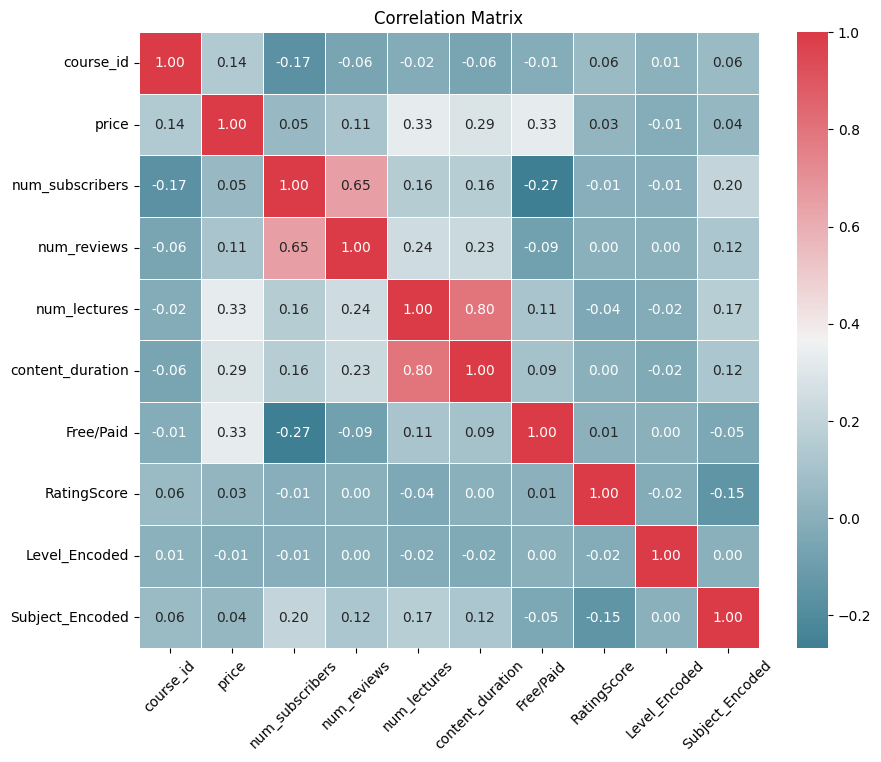

In [123]:
corr_matrix=df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create a custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix,cmap=cmap, annot=True, fmt=".2f", linewidths=0.5, ax=ax)

# Set the title of the plot
plt.title('Correlation Matrix')
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Price Frequency

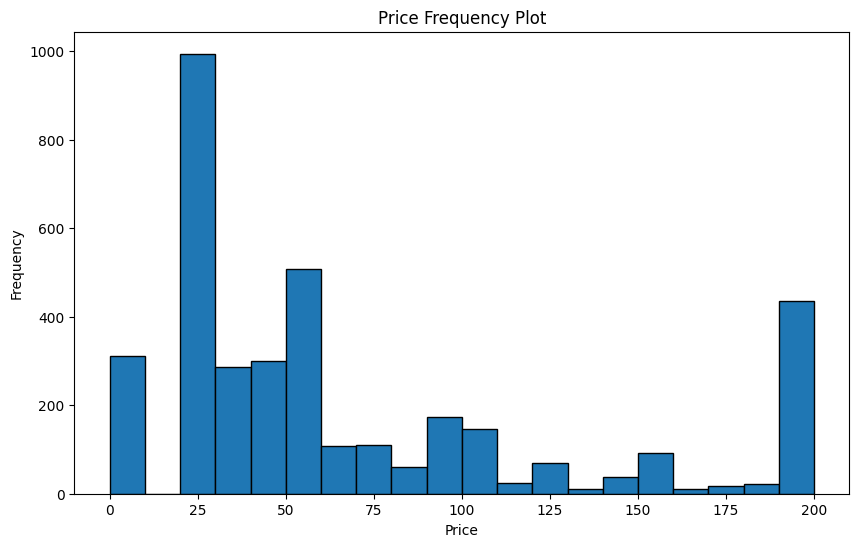

In [124]:
# Plot a histogram of price frequencies
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Frequency Plot')

# Show the plot
plt.show()

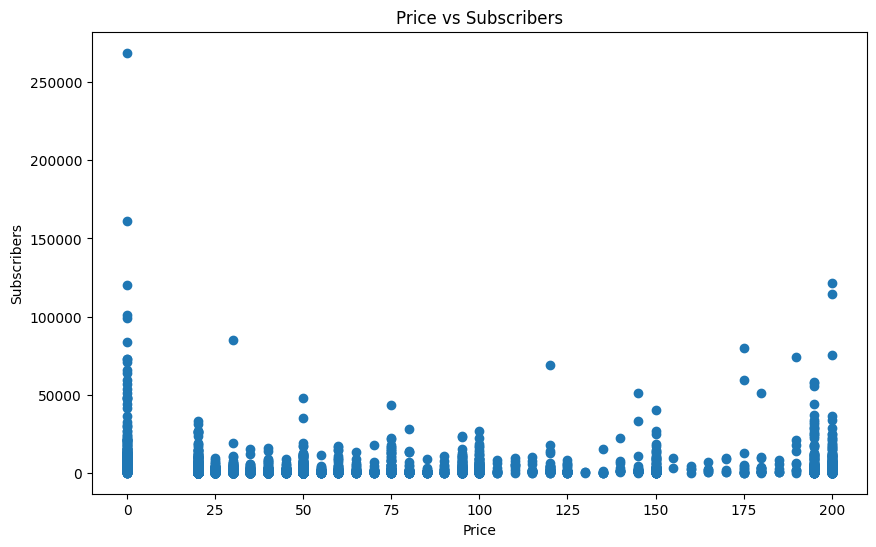

In [125]:
# Plot a scatter plot of price versus subscribers
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['num_subscribers'])
plt.xlabel('Price')
plt.ylabel('Subscribers')
plt.title('Price vs Subscribers')

# Show the plot
plt.show()

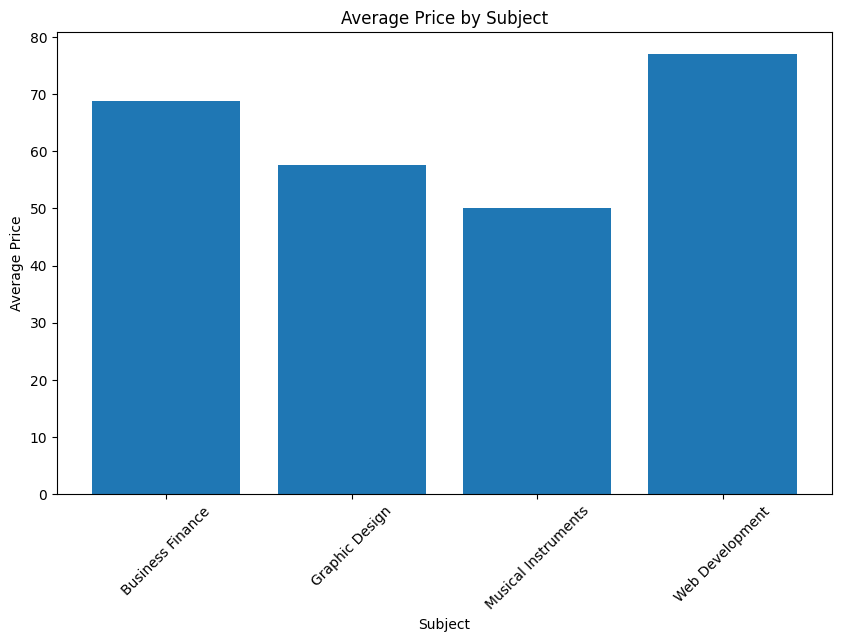

In [126]:
# Group the data by subject and calculate the average price for each subject
subject_prices = df.groupby('subject')['price'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(subject_prices.index, subject_prices.values)

plt.xlabel('Subject')
plt.ylabel('Average Price')
plt.title('Average Price by Subject')

plt.xticks(rotation=45)

plt.show()

### Subject Distribution by Level

<Figure size 800x800 with 0 Axes>

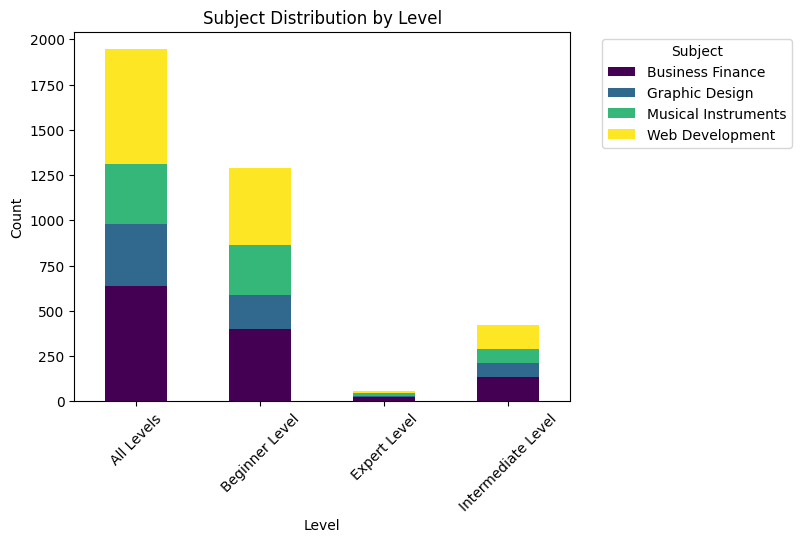

In [127]:
# Create a bar chart
plt.figure(figsize=(8, 8))

# Count the occurrences of each subject for each level
df_counts = df.groupby(['level','subject']).size().unstack()

# Plot the bar chart
df_counts.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Subject Distribution by Level')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

### Table of level subject

In [128]:
# Create a frequency table (crosstab)
table_level_subject = pd.crosstab(df['level'], df['subject'])
table_level_subject

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
level,,,,
All Levels,636,342,333,633
Beginner Level,402,188,275,424
Expert Level,25,7,12,14
Intermediate Level,135,76,80,134


### Distribution of Free/Paid by Subject

<Figure size 800x800 with 0 Axes>

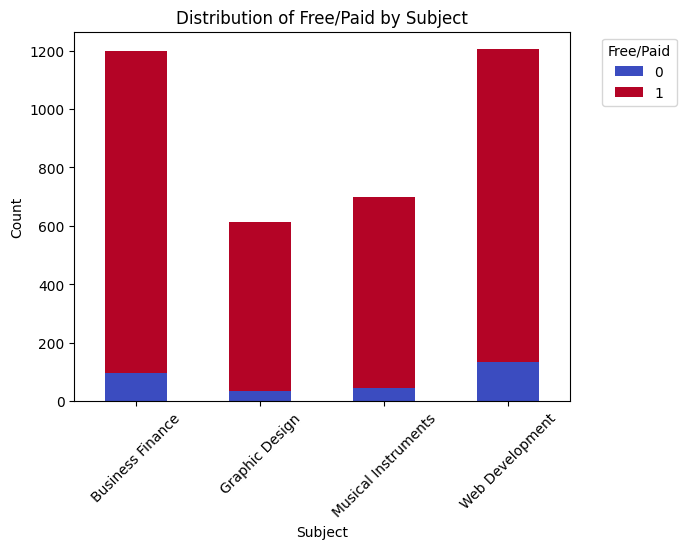

In [129]:
# Create a bar chart
plt.figure(figsize=(8, 8))

# Count the occurrences of each 'Free/Paid' for each 'subject'
df_counts = df.groupby(['subject', 'Free/Paid']).size().unstack()

# Plot the bar chart
df_counts.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Distribution of Free/Paid by Subject')
plt.legend(title='Free/Paid', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.show()

### Table of Price and Subject

In [130]:
# Create a frequency table (crosstab)
table_price_subject = pd.crosstab(df['Free/Paid'], df['subject'])
table_price_subject

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
Free/Paid,,,,
0,96,35,46,134
1,1102,578,654,1071


### Bar chart of Free and Paid proportion

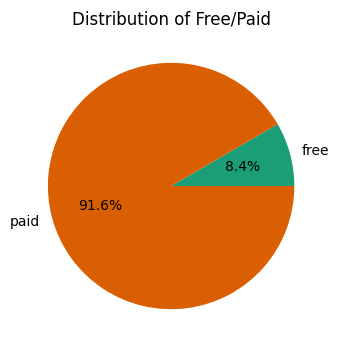

In [131]:
# Count the occurrences of each 'Free/Paid'
df_counts = df.groupby('Free/Paid').size()

# Map values for the pie chart
labels = ['free', 'paid']
values = [df_counts.get(0, 0), df_counts.get(1, 0)]

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('Dark2'))
plt.title('Distribution of Free/Paid')

# Remove the spines (top and right borders)
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()

### Scatterplot correation between number of lectures and number of reviews

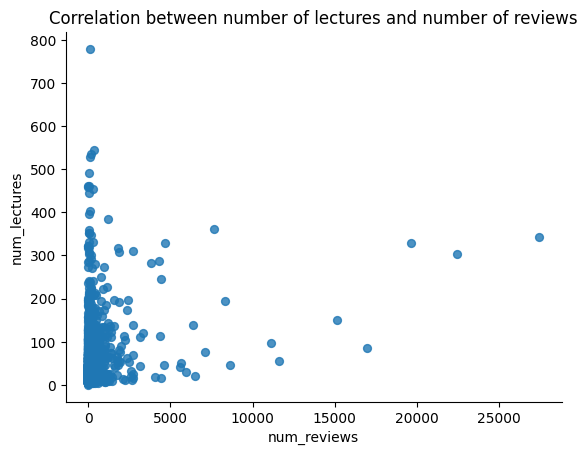

In [132]:
df.plot(kind='scatter', x='num_reviews', y='num_lectures', s=32, alpha=.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Correlation between number of lectures and number of reviews')
plt.show()

### Subjects Visualization

Text(0.5, 1.0, 'Subject Distribution')

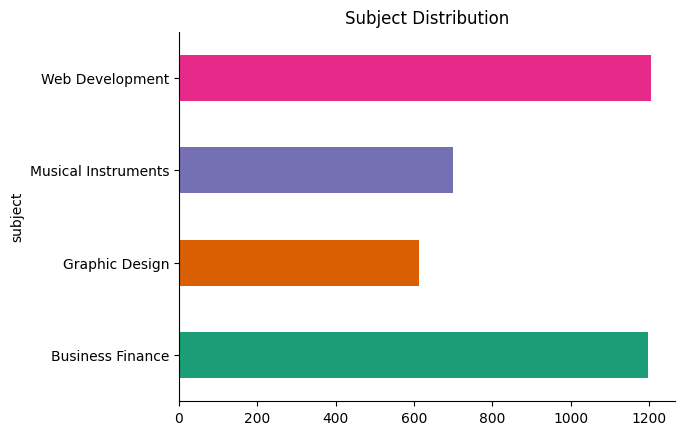

In [133]:
df.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Subject Distribution')


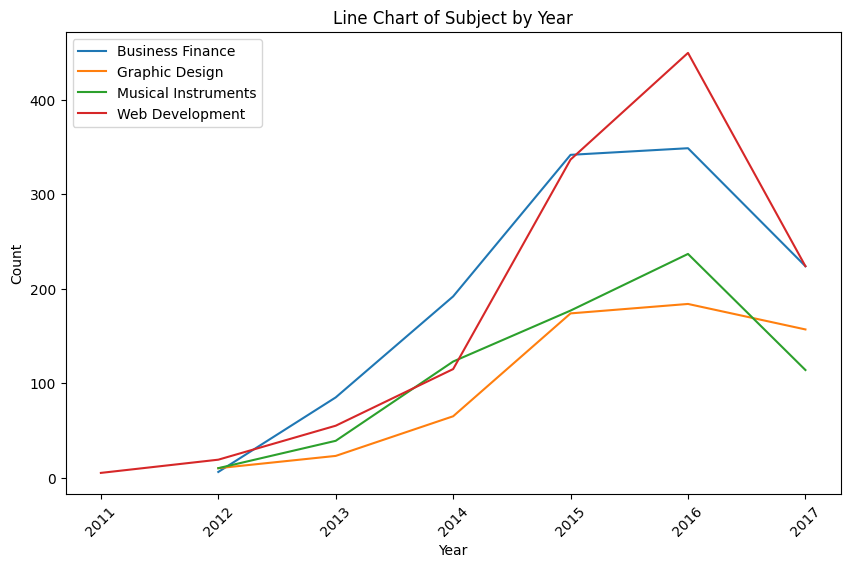

In [134]:
# Extract the year from the 'date' column
df['year'] = df['Date'].dt.year

# Group the data by 'subject' and 'year' and aggregate by count
df_grouped = df.groupby(['subject', 'year']).size().reset_index(name='count')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a line for each subject
for subject in df_grouped['subject'].unique():
    subject_data = df_grouped[df_grouped['subject'] == subject]
    ax.plot(subject_data['year'], subject_data['count'], label=subject)

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Line Chart of Subject by Year')

# Add a legend
ax.legend()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

Top selling course

In [135]:
top_10_selling_course = df.sort_values(by='num_subscribers', ascending=False).iloc[0:10]
top_10_selling_course

,course_id,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,Date,Free/Paid,RatingScore,Level_Encoded,Subject_Encoded,year
2476,41295,0.0,268923,8629,45,Beginner Level,10.5,Web Development,2013-02-14,0,0.82,1,3,2013
2477,59014,0.0,161029,279,27,Expert Level,3.5,Web Development,2013-06-09,0,0.69,3,3,2013
2478,625204,200.0,121584,27445,342,Beginner Level,43.0,Web Development,2015-11-02,1,0.89,1,3,2015
2479,173548,0.0,120291,5924,30,All Levels,3.0,Web Development,2014-04-08,0,0.78,0,3,2014
2480,764164,200.0,114512,22412,304,Beginner Level,30.5,Web Development,2016-03-08,1,0.55,1,3,2016
1796,19421,0.0,101154,1042,95,All Levels,4.5,Musical Instruments,2012-06-15,0,0.88,0,2,2012
2481,473160,0.0,98867,6512,20,All Levels,3.0,Web Development,2015-04-13,0,0.82,0,3,2015
2482,94430,30.0,84897,2685,10,All Levels,2.0,Web Development,2013-10-10,1,0.79,0,3,2013
2483,130064,0.0,83737,4598,45,Intermediate Level,6.5,Web Development,2014-07-19,0,0.85,2,3,2014
2484,364426,175.0,79612,16976,85,All Levels,11.5,Web Development,2015-03-12,1,0.69,0,3,2015


We can see that the top 10 selling courses are majority in Web Development

### Course quality affects students' willingness to pay

                  RatingScore     price  content_duration  num_subscribers  \
RatingScore          1.000000  0.033487          0.000426        -0.008506   
price                0.033487  1.000000          0.291695         0.050341   
content_duration     0.000426  0.291695          1.000000         0.162508   
num_subscribers     -0.008506  0.050341          0.162508         1.000000   
num_reviews          0.003625  0.113164          0.229473         0.650854   

                  num_reviews  
RatingScore          0.003625  
price                0.113164  
content_duration     0.229473  
num_subscribers      0.650854  
num_reviews          1.000000  


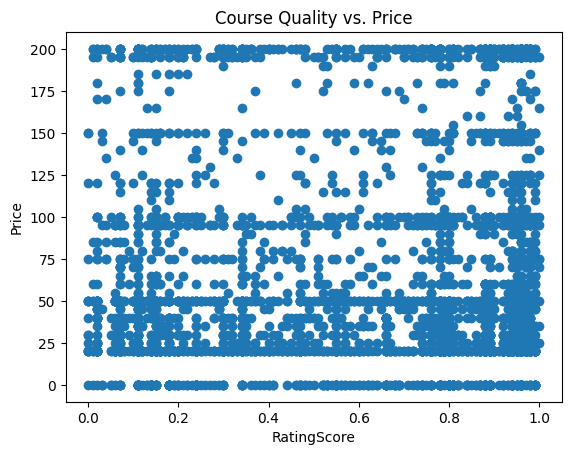

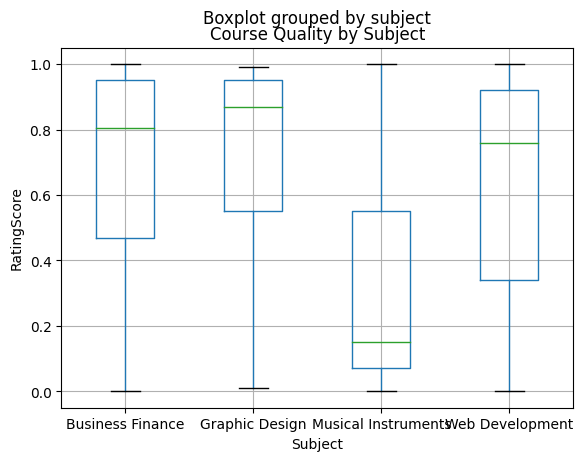

In [136]:
# Correlation analysis
correlation = df[['RatingScore', 'price', 'content_duration', 'num_subscribers', 'num_reviews']].corr()
print(correlation)

# Scatter plot of RatingScore vs. price
plt.scatter(df['RatingScore'], df['price'])
plt.xlabel('RatingScore')
plt.ylabel('Price')
plt.title('Course Quality vs. Price')
plt.show()

# Box plot of RatingScore by subject
df.boxplot(column='RatingScore', by='subject')
plt.xlabel('Subject')
plt.ylabel('RatingScore')
plt.title('Course Quality by Subject')
plt.show()

# MACHINE LEARNING MODEL

## Overview

PART 1: FREE/PAID PREDICTION
- Purpose: Pricing Strategy, Revenue Analysis, Marketing, User Segmentation
- Strategy: Apply Classification to define Free/Paid courses
- Model Use:
  + Logistic Regression
  + Random Forest
  + SVM
- Variables Selected:
  + Number of Lectures
  + Level
  + Content Duration
  + Subject
  + Timestamp / Date

## PART 1: FREE/PAID PREDICTION


### Data Handling

In [137]:
df1 = df.copy()

In [138]:
import datetime as dt
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date']=df1['Date'].map(dt.datetime.toordinal)
df1['Date'].unique()

array([734978, 734965, 735227, ..., 735844, 736338, 736334])

In [139]:
# Drop before_encoded columns and unecessary columns
df1.drop(['level','subject'], axis=1, inplace=True)

In [140]:
df1.head(10)

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,Date,Free/Paid,RatingScore,Level_Encoded,Subject_Encoded,year
0,49798,0.0,65576,936,24,8.0,734978,0,0.56,0,0,2013
1,48841,0.0,56659,4397,16,1.5,734965,0,0.95,1,0,2013
2,133536,0.0,50855,2698,15,1.5,735227,0,0.91,0,0,2013
3,151668,0.0,29167,1463,8,1.5,735380,0,0.18,0,0,2014
4,648826,195.0,24481,2347,174,10.0,735984,1,0.37,0,0,2016
5,97338,0.0,22344,712,26,3.5,735157,0,0.89,0,0,2013
6,321410,195.0,22257,2697,138,7.5,735562,1,0.13,2,0,2014
7,301442,200.0,20195,1113,227,16.0,735533,1,0.21,0,0,2014
8,189160,0.0,19614,635,14,1.5,735346,0,0.30,0,0,2014
9,191854,0.0,19339,794,9,2.0,735323,0,0.89,0,0,2014


In [141]:
# Create X and y
X = df1.drop(['Free/Paid'], axis=1)
y = df1['Free/Paid']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### Logistic Regression

In [142]:
# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_lr = logreg.predict(X_test)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print the evaluation metrics
print("Logistic Regression Evaluation Report")
print("Accuracy: {:.4f}".format(round(accuracy_lr, 4)))
print("Precision: {:.4f}".format(round(precision_lr, 4)))
print("Recall: {:.4f}".format(round(recall_lr, 4)))
print("F1 Score: {:.4f}".format(round(f1_lr, 4)))

Logistic Regression Evaluation Report
Accuracy: 0.9939
Precision: 0.9971
Recall: 0.9963
F1 Score: 0.9967


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


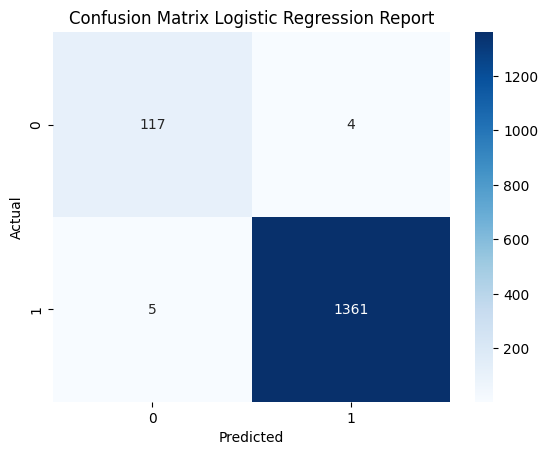

In [143]:
# Calculate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression Report')
plt.show()

### Random Forest

In [144]:
# Create and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_rf = rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Evaluation Report")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Evaluation Report
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


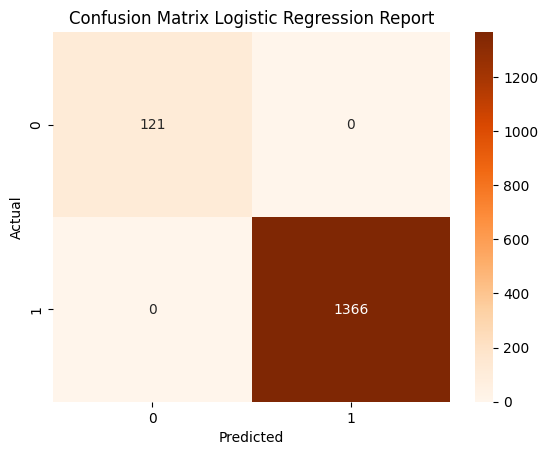

In [145]:
# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression Report')
plt.show()

### SVM

In [146]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM classifier
svm = SVC(kernel='rbf', random_state=1)
svm.fit(X_train_scaled, y_train)

# Predict the target variable for the test set
y_pred_svm = svm.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print the evaluation metrics
print("Support Vector Machine Evaluation Report")
print("Accuracy: {:.4f}".format(accuracy_svm))
print("Precision: {:.4f}".format(precision_svm))
print("Recall: {:.4f}".format(recall_svm))
print("F1 Score: {:.4f}".format(f1_svm))

Support Vector Machine Evaluation Report
Accuracy: 0.9872
Precision: 0.9898
Recall: 0.9963
F1 Score: 0.9931


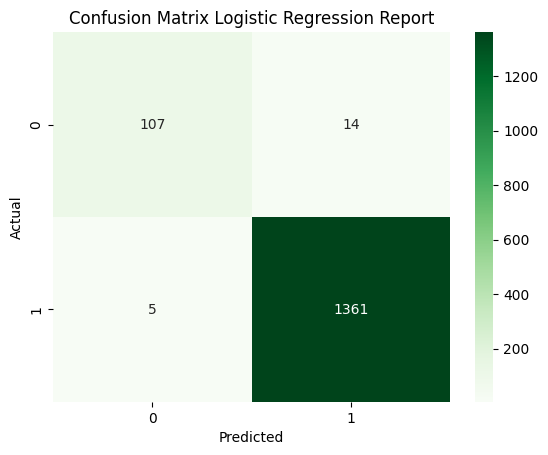

In [147]:
# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_svm, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression Report')
plt.show()

### Neural Networks

In [148]:
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(X_train)

clf = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X_scaled, y_train.values)


MLPClassifier(activation='logistic', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

In [150]:
# Predict the target variable for the train and test set
y_pred_nn = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [151]:
from dmba import classificationSummary

# training performance
classificationSummary(y_train, clf.predict(X_train))
# validation performance
classificationSummary(y_test, clf.predict(X_test))

Confusion Matrix (Accuracy 0.8789)

       Prediction
Actual    0    1
     0   35  155
     1  115 1924
Confusion Matrix (Accuracy 0.8783)

       Prediction
Actual    0    1
     0   18  103
     1   78 1288


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [152]:
# Calculate evaluation metrics
accuracy_nn = accuracy_score(y_test.values, y_pred_nn)
precision_nn = precision_score(y_test.values, y_pred_nn)
recall_nn = recall_score(y_test.values, y_pred_nn)
f1_nn = f1_score(y_test.values, y_pred_nn)

# Print the evaluation metrics
print("NN Evaluation Report")
print("Accuracy: {:.4f}".format(accuracy_nn))
print("Precision: {:.4f}".format(precision_nn))
print("Recall: {:.4f}".format(recall_nn))
print("F1 Score: {:.4f}".format(f1_nn))

NN Evaluation Report
Accuracy: 0.8783
Precision: 0.9260
Recall: 0.9429
F1 Score: 0.9343


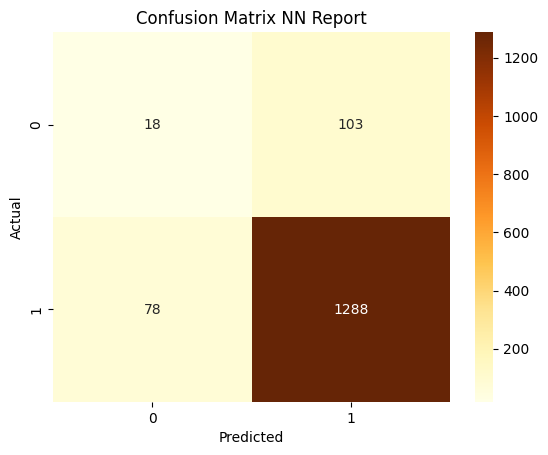

In [153]:
# Calculate the confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_nn, annot=True, cmap='YlOrBr', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix NN Report')
plt.show()

### Conclusion



Random Forest shown to be the most accurate model among three: Logistic Regression, Random Forest, SVM


## PART 2: PRICE PREDICTION


### Data Handling

In [154]:
df2 = df1.copy()

In [155]:
df2.columns

Index(['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures',
       'content_duration', 'Date', 'Free/Paid', 'RatingScore', 'Level_Encoded',
       'Subject_Encoded', 'year'],
      dtype='object')

In [156]:
df2.head(15)

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,Date,Free/Paid,RatingScore,Level_Encoded,Subject_Encoded,year
0,49798,0.0,65576,936,24,8.0,734978,0,0.56,0,0,2013
1,48841,0.0,56659,4397,16,1.5,734965,0,0.95,1,0,2013
2,133536,0.0,50855,2698,15,1.5,735227,0,0.91,0,0,2013
3,151668,0.0,29167,1463,8,1.5,735380,0,0.18,0,0,2014
4,648826,195.0,24481,2347,174,10.0,735984,1,0.37,0,0,2016
5,97338,0.0,22344,712,26,3.5,735157,0,0.89,0,0,2013
6,321410,195.0,22257,2697,138,7.5,735562,1,0.13,2,0,2014
7,301442,200.0,20195,1113,227,16.0,735533,1,0.21,0,0,2014
8,189160,0.0,19614,635,14,1.5,735346,0,0.30,0,0,2014
9,191854,0.0,19339,794,9,2.0,735323,0,0.89,0,0,2014


In [157]:
#Drop where the price is 0
df2 = df2[df2['price'] != 0]

# Reset the index
df2 = df2.reset_index(drop=True)

In [158]:
# Assuming X contains the feature variables and y contains the target variable
X = df2[['num_subscribers', 'course_id', 'Subject_Encoded','num_reviews', 'num_lectures', 'Level_Encoded', 'RatingScore', 'content_duration']]
y = df2['price']

# Split the data into training and test sets
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(X, y, test_size=0.4, random_state=1)

### Linear Regression Prediction

In [159]:
# Create and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_1, y_train_1)

# Predict the target variable for the test set
y_pred_lr_1 = linear_reg.predict(X_valid_1)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_valid_1, y_pred_lr_1)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_valid_1, y_pred_lr_1)

# Print the evaluation metrics
print("Linear Regression Evaluation Report")
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)

Linear Regression Evaluation Report
Mean Squared Error: 3082.7827614607513
Root Mean Squared Error: 55.52281298223957
R-squared: 0.15980185776452116


The mean squared error (MSE) measures the average squared difference between the predicted and actual values. In this case, the MSE is 3331.1949086823283.

The root mean squared error (RMSE) is the square root of the MSE and provides a more interpretable measure of the error. The RMSE in this case is 57.716504647131295.

The R-squared value represents the proportion of the variance in the target variable that can be explained by the model. It ranges from 0 to 1, with higher values indicating a better fit. In this case, the R-squared value is 0.11712129555942219, which suggests that the linear regression model explains only a small portion of the variance in the data.

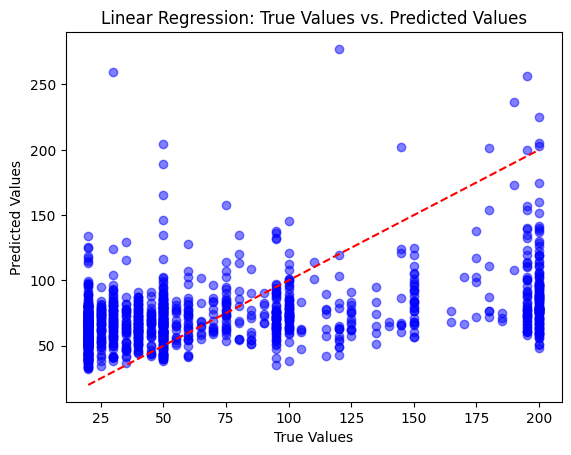

In [160]:
# Scatter plot of true values vs. predicted values
plt.scatter(y_valid_1, y_pred_lr_1, color='blue', alpha=0.5)
plt.plot([y_valid_1.min(), y_valid_1.max()], [y_valid_1.min(), y_valid_1.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: True Values vs. Predicted Values')
plt.show()

### Gradient Boosting

In [161]:
# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_1, y_train_1)

# Predict the target variable for the validation set
y_pred_gb_1 = gb_model.predict(X_valid_1)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_valid_1, y_pred_gb_1)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_valid_1, y_pred_gb_1)

# Print the evaluation metrics
print("Gradient Boosting Evaluation Report")
print("Mean Squared Error:", mse_gb)
print("Root Mean Squared Error:", rmse_gb)
print("R-squared:", r2_gb)

Gradient Boosting Evaluation Report
Mean Squared Error: 2747.04679719905
Root Mean Squared Error: 52.4122771609768
R-squared: 0.2513051375222731


### Neural Networks

In [183]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Define the neural network architecture
regressor = MLPRegressor(hidden_layer_sizes=(4,), activation='logistic', solver='lbfgs', random_state=1)

# Train the model
regressor.fit(X_train_scaled, y_train)

# Predict the target variable for the validation set
y_pred = regressor.predict(X_valid_scaled)

# Calculate evaluation metrics
mse_nn = mean_squared_error(y_valid, y_pred)
rmse_nn = np.sqrt(mse_nn)
r2 = r2_score(y_valid, y_pred)

# Print the evaluation metrics
print("Neural Network Evaluation Metrics")
print("Mean Squared Error:", mse_nn)
print("Root Mean Squared Error:", rmse_nn)
print("R-squared:", r2)

Neural Network Evaluation Metrics
Mean Squared Error: 2975.9402049528153
Root Mean Squared Error: 54.55217873699286
R-squared: 0.19803292657628058


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Conclusion

Gradient Boosting proved to be the best model (25.1%) and followed by NN (21.9%)

## PART 3: PRICE PREDICTION FOR EACH SUBJECT USING LINEAR REGRESSION AND NEURAL NETWORKS


### Data Handling

In [163]:
# Create the the df for Subject

# df['Subject_Encoded'] = df['subject'].map({'Business Finance':0, 'Graphic Design':1, 'Musical Instruments':2,'Web Development':3})

subject_dfs = {}

for subject, subject_df in df2.groupby('Subject_Encoded'):
    subject_dfs[subject] = subject_df.copy()

In [164]:
# Split X, y for each subject

X_train_subjects = {}
X_valid_subjects = {}
y_train_subjects = {}
y_valid_subjects = {}

for subject, subject_df in subject_dfs.items():
    X_subject = subject_df[['num_subscribers', 'course_id', 'Subject_Encoded','num_reviews', 'num_lectures', 'Level_Encoded', 'RatingScore', 'content_duration']]
    y_subject = subject_df['price']

    X_train, X_valid, y_train, y_valid = train_test_split(X_subject, y_subject, test_size=0.4, random_state=1)

    X_train_subjects[subject] = X_train.copy()
    X_valid_subjects[subject] = X_valid.copy()
    y_train_subjects[subject] = y_train.copy()
    y_valid_subjects[subject] = y_valid.copy()

### Business Finance

In [165]:
# For 'Business Finance':0
subject_dfs[0]

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,Date,Free/Paid,RatingScore,Level_Encoded,Subject_Encoded,year
0,648826,195.0,24481,2347,174,10.0,735984,1,0.37,0,0,2016
1,321410,195.0,22257,2697,138,7.5,735562,1,0.13,2,0,2014
2,301442,200.0,20195,1113,227,16.0,735533,1,0.21,0,0,2014
3,308690,195.0,16900,2476,52,5.5,735579,1,0.16,1,0,2014
4,285638,60.0,16385,273,45,3.0,735478,1,0.78,1,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
3385,42197,120.0,623,43,8,2.5,734918,1,0.96,1,0,2013
3395,689868,200.0,103,25,12,2.5,735946,1,0.90,1,0,2015
3398,410196,20.0,44,3,8,1.0,735683,1,0.94,0,0,2015
3399,871682,20.0,34,4,9,8.0,736145,1,0.97,0,0,2016


In [166]:
# Create and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_subjects[0], y_train_subjects[0])

# Predict the target variable for the test set
y_pred_lr_bf = linear_reg.predict(X_valid_subjects[0])

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_valid_subjects[0], y_pred_lr_bf)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_valid_subjects[0], y_pred_lr_bf)

# Print the evaluation metrics
print("Linear Regression Evaluation Report")
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)

Linear Regression Evaluation Report
Mean Squared Error: 3476.7141385646514
Root Mean Squared Error: 58.96366795378872
R-squared: 0.1434570386486138


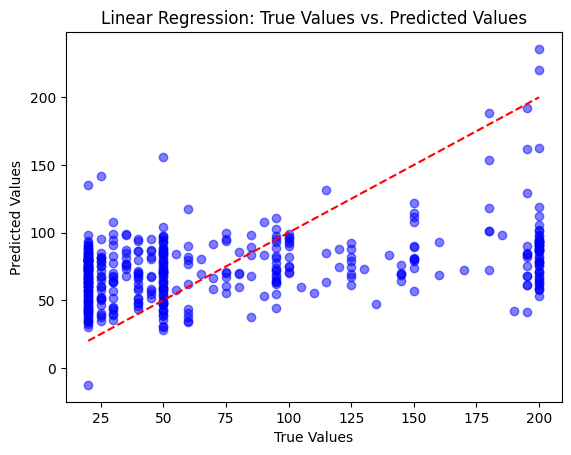

In [167]:
# Scatter plot of true values vs. predicted values
plt.scatter(y_valid_subjects[0], y_pred_lr_bf, color='blue', alpha=0.5)
plt.plot([y_valid_subjects[0].min(), y_valid_subjects[0].max()], [y_valid_subjects[0].min(), y_valid_subjects[0].max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: True Values vs. Predicted Values')
plt.show()

In [168]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subjects[0])
X_valid_scaled = scaler.transform(X_valid_subjects[0])

# Define the neural network architecture
regressor = MLPRegressor(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', random_state=1)

# Train_subjects[0] the model
regressor.fit(X_train_scaled, y_train_subjects[0])

# Predict the target variable for the valid_subjects[0]ation set
y_pred = regressor.predict(X_valid_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_valid_subjects[0], y_pred)
r2 = r2_score(y_valid_subjects[0], y_pred)

# Print the evaluation metrics
print("Neural Network Evaluation Metrics")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Neural Network Evaluation Metrics
Mean Squared Error: 3769.5566765684152
R-squared: 0.07131069451030769


### Graphic Design

In [169]:
# For 'Graphic Design':1
subject_dfs[1]

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,Date,Free/Paid,RatingScore,Level_Encoded,Subject_Encoded,year
1095,820194,200.0,36288,737,63,5.0,736124,1,0.96,0,1,2016
1096,249126,20.0,33205,481,12,0.7,735414,1,0.88,1,1,2014
1097,874012,150.0,26742,2379,62,11.0,736352,1,0.24,1,1,2017
1098,385462,20.0,25277,311,16,1.0,735603,1,0.38,1,1,2015
1099,178044,200.0,24857,35,11,1.5,735307,1,0.89,0,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
3394,513846,20.0,108,3,44,5.5,735829,1,0.98,1,1,2015
3397,1019552,35.0,74,1,11,1.5,736292,1,0.61,1,1,2016
3400,435138,20.0,22,3,57,2.0,735673,1,0.79,1,1,2015
3401,1165268,30.0,8,0,20,3.0,736430,1,0.94,0,1,2017


In [170]:
# Create and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_subjects[1], y_train_subjects[1])

# Predict the target variable for the test set
y_pred_lr_bf = linear_reg.predict(X_valid_subjects[1])

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_valid_subjects[1], y_pred_lr_bf)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_valid_subjects[1], y_pred_lr_bf)

# Print the evaluation metrics
print("Linear Regression Evaluation Report")
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)

Linear Regression Evaluation Report
Mean Squared Error: 2783.0580317742283
Root Mean Squared Error: 52.75469677454537
R-squared: 0.2196712775366989


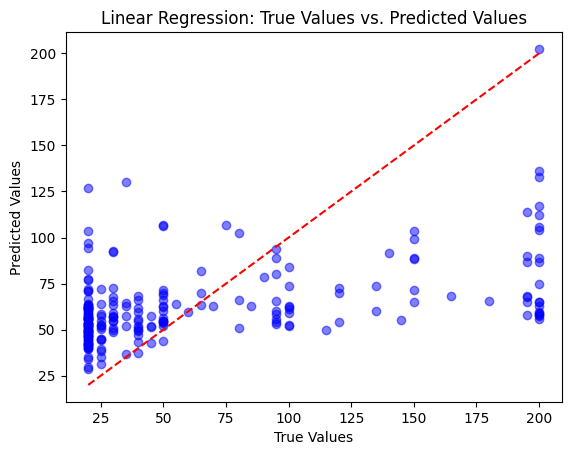

In [171]:
# Scatter plot of true values vs. predicted values
plt.scatter(y_valid_subjects[1], y_pred_lr_bf, color='blue', alpha=0.5)
plt.plot([y_valid_subjects[1].min(), y_valid_subjects[1].max()], [y_valid_subjects[1].min(), y_valid_subjects[1].max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: True Values vs. Predicted Values')
plt.show()

In [172]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subjects[1])
X_valid_scaled = scaler.transform(X_valid_subjects[1])

# Define the neural network architecture
regressor = MLPRegressor(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', random_state=1)

# Train_subjects[1] the model
regressor.fit(X_train_scaled, y_train_subjects[1])

# Predict the target variable for the valid_subjects[1]ation set
y_pred = regressor.predict(X_valid_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_valid_subjects[1], y_pred)
r2 = r2_score(y_valid_subjects[1], y_pred)

# Print the evaluation metrics
print("Neural Network Evaluation Metrics")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Neural Network Evaluation Metrics
Mean Squared Error: 2776.4443137137037
R-squared: 0.22152566724254752


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Musical Instrument

In [173]:
# For 'Musical Instrument':2
subject_dfs[2]

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,Date,Free/Paid,RatingScore,Level_Encoded,Subject_Encoded,year
1662,238934,200.0,75499,7676,362,30.00,735452,1,0.96,1,2,2014
1663,42271,145.0,32935,2713,310,34.00,735017,1,0.65,0,2,2013
1664,26956,20.0,26504,192,82,2.50,734797,1,0.41,0,2,2012
1665,456284,200.0,21701,1340,136,9.50,735716,1,0.30,0,2,2015
1666,59922,20.0,14560,20,32,2.00,735035,1,0.30,0,2,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3391,869312,30.0,137,2,43,4.50,736128,1,0.66,2,2,2016
3392,266682,35.0,114,8,59,2.00,735507,1,0.78,0,2,2014
3393,398224,195.0,113,2,34,2.00,735709,1,0.78,0,2,2015
3396,782460,50.0,85,2,30,1.50,736054,1,0.75,1,2,2016


In [174]:
# Create and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_subjects[2], y_train_subjects[2])

# Predict the target variable for the test set
y_pred_lr_bf = linear_reg.predict(X_valid_subjects[2])

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_valid_subjects[2], y_pred_lr_bf)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_valid_subjects[2], y_pred_lr_bf)

# Print the evaluation metrics
print("Linear Regression Evaluation Report")
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)

Linear Regression Evaluation Report
Mean Squared Error: 1560.0654887455262
Root Mean Squared Error: 39.497664345446125
R-squared: 0.1292031712950401


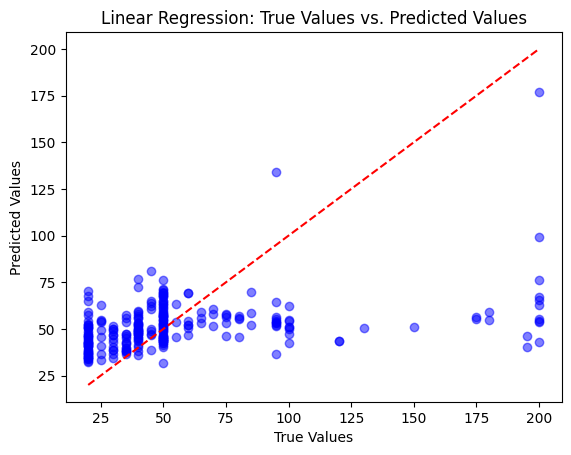

In [175]:
# Scatter plot of true values vs. predicted values
plt.scatter(y_valid_subjects[2], y_pred_lr_bf, color='blue', alpha=0.5)
plt.plot([y_valid_subjects[2].min(), y_valid_subjects[2].max()], [y_valid_subjects[2].min(), y_valid_subjects[2].max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: True Values vs. Predicted Values')
plt.show()

In [176]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subjects[2])
X_valid_scaled = scaler.transform(X_valid_subjects[2])

# Define the neural network architecture
regressor = MLPRegressor(hidden_layer_sizes=(4,), activation='logistic', solver='lbfgs', random_state=1)

# Train_subjects[2] the model
regressor.fit(X_train_scaled, y_train_subjects[2])

# Predict the target variable for the valid_subjects[2]ation set
y_pred = regressor.predict(X_valid_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_valid_subjects[2], y_pred)
r2 = r2_score(y_valid_subjects[2], y_pred)

# Print the evaluation metrics
print("Neural Network Evaluation Metrics")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Neural Network Evaluation Metrics
Mean Squared Error: 1592.4254153930196
R-squared: 0.11114051834550165


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Web Development

In [177]:
# For'Web Development':3
subject_dfs[3]

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,Date,Free/Paid,RatingScore,Level_Encoded,Subject_Encoded,year
2296,625204,200.0,121584,27445,342,43.0,735904,1,0.89,1,3,2015
2297,764164,200.0,114512,22412,304,30.5,736031,1,0.55,1,3,2016
2298,94430,30.0,84897,2685,10,2.0,735151,1,0.79,0,3,2013
2299,364426,175.0,79612,16976,85,11.5,735669,1,0.69,0,3,2015
2300,756150,190.0,73783,19649,329,22.0,736005,1,0.90,1,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
3362,1248172,125.0,34,2,21,1.5,736491,1,0.46,1,3,2017
3363,1250934,100.0,25,4,66,12.5,736495,1,0.67,1,3,2017
3364,1270222,200.0,19,2,33,4.0,736508,1,0.12,1,3,2017
3365,427530,60.0,14813,1358,74,13.5,735652,1,0.15,1,3,2015


In [178]:
# Create and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_subjects[3], y_train_subjects[3])

# Predict the target variable for the test set
y_pred_lr_bf = linear_reg.predict(X_valid_subjects[3])

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_valid_subjects[3], y_pred_lr_bf)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_valid_subjects[3], y_pred_lr_bf)

# Print the evaluation metrics
print("Linear Regression Evaluation Report")
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)

Linear Regression Evaluation Report
Mean Squared Error: 3498.85522083636
Root Mean Squared Error: 59.151121889921576
R-squared: 0.16955560308877005


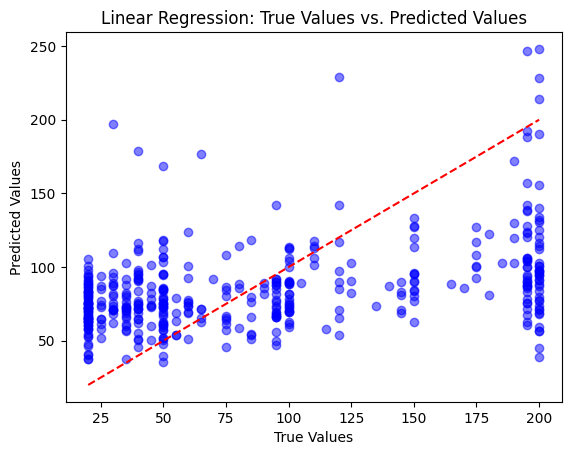

In [179]:
# Scatter plot of true values vs. predicted values
plt.scatter(y_valid_subjects[3], y_pred_lr_bf, color='blue', alpha=0.5)
plt.plot([y_valid_subjects[3].min(), y_valid_subjects[3].max()], [y_valid_subjects[3].min(), y_valid_subjects[3].max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: True Values vs. Predicted Values')
plt.show()

In [180]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subjects[3])
X_valid_scaled = scaler.transform(X_valid_subjects[3])

# Define the neural network architecture
regressor = MLPRegressor(hidden_layer_sizes=(4,), activation='logistic', solver='lbfgs', random_state=1)

# Train_subjects[3] the model
regressor.fit(X_train_scaled, y_train_subjects[3])

# Predict the target variable for the valid_subjects[3]ation set
y_pred = regressor.predict(X_valid_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_valid_subjects[3], y_pred)
r2 = r2_score(y_valid_subjects[3], y_pred)

# Print the evaluation metrics
print("Neural Network Evaluation Metrics")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Neural Network Evaluation Metrics
Mean Squared Error: 3306.289172410054
R-squared: 0.21526066541848143


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## SUGGESTION

For Price Prediction, we still can't have an optimal model. Therefore, we suggest to add more data and details of measurement. At the same time, Udemy will need to control their course quality so that the value of money can be optimal, by that they can retain more users and having higher market positioning.

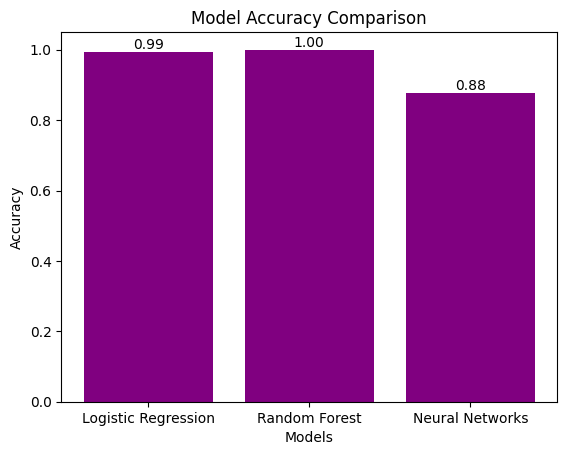

In [186]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'Neural Networks']
accuracies = [0.9939, 1.0, 0.8783]

plt.bar(models, accuracies, color='purple')

# Add labels on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

plt.show()

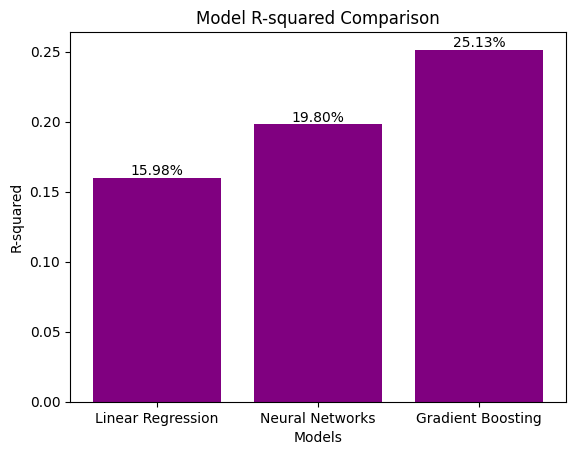

In [188]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Neural Networks', 'Gradient Boosting']
r_squared = [0.1598, 0.1980, 0.2513]

plt.bar(models, r_squared, color='purple')

# Add labels on top of each bar
for i, v in enumerate(r_squared):
    plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Model R-squared Comparison')

plt.show()